In [1]:
#Import Library
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Bidirectional 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [2]:
#load dataset after preprocessing
dna = pd.read_csv('d_na.csv')
dns = pd.read_csv('d_ns.csv')
dsa = pd.read_csv('d_sa.csv')
dss = pd.read_csv('d_ss.csv')

Epoch 1/100
7/7 [==============================] - 7s 353ms/step - loss: 0.6816 - accuracy: 0.6265 - val_loss: 0.6572 - val_accuracy: 0.6111
Epoch 2/100
7/7 [==============================] - 0s 31ms/step - loss: 0.6616 - accuracy: 0.6265 - val_loss: 0.6594 - val_accuracy: 0.6111
Epoch 3/100
7/7 [==============================] - 0s 36ms/step - loss: 0.6533 - accuracy: 0.6265 - val_loss: 0.6513 - val_accuracy: 0.6111
Epoch 4/100
7/7 [==============================] - 0s 35ms/step - loss: 0.6439 - accuracy: 0.6265 - val_loss: 0.6402 - val_accuracy: 0.6111
Epoch 5/100
7/7 [==============================] - 0s 32ms/step - loss: 0.6295 - accuracy: 0.6265 - val_loss: 0.6155 - val_accuracy: 0.6111
Epoch 6/100
7/7 [==============================] - 0s 32ms/step - loss: 0.5836 - accuracy: 0.6311 - val_loss: 0.5483 - val_accuracy: 0.6574
Epoch 7/100
7/7 [==============================] - 0s 34ms/step - loss: 0.4692 - accuracy: 0.7819 - val_loss: 0.4803 - val_accuracy: 0.8148
Epoch 8/100
7/7 [==

7/7 [==============================] - 0s 33ms/step - loss: 0.0153 - accuracy: 0.9930 - val_loss: 0.8614 - val_accuracy: 0.8241
Epoch 60/100
7/7 [==============================] - 0s 34ms/step - loss: 0.0116 - accuracy: 0.9954 - val_loss: 0.8670 - val_accuracy: 0.8333
Epoch 61/100
7/7 [==============================] - 0s 33ms/step - loss: 0.0134 - accuracy: 0.9954 - val_loss: 0.9064 - val_accuracy: 0.8426
Epoch 62/100
7/7 [==============================] - 0s 34ms/step - loss: 0.0128 - accuracy: 0.9954 - val_loss: 0.9282 - val_accuracy: 0.8333
Epoch 63/100
7/7 [==============================] - 0s 35ms/step - loss: 0.0106 - accuracy: 0.9977 - val_loss: 0.9756 - val_accuracy: 0.8148
Epoch 64/100
7/7 [==============================] - 0s 33ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 1.0983 - val_accuracy: 0.8148
Epoch 65/100
7/7 [==============================] - 0s 33ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 1.1207 - val_accuracy: 0.8148
Epoch 66/100
7/7 [========

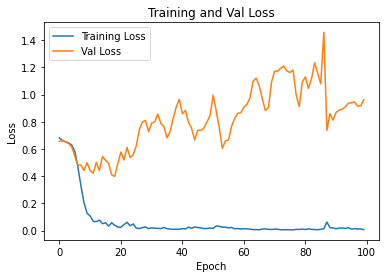

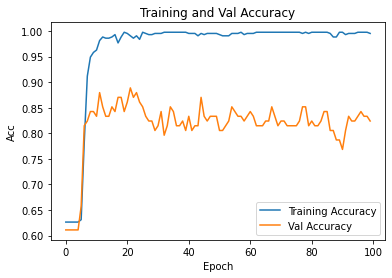

In [9]:
#Model Sentiment with NLTK stopword and Nazief Adriani Stemmer
texts = dna['Ulasan'].astype(str)
labels = dna['Label']

#Tokenizer and Pad Sequence
dna_token = Tokenizer(num_words=10000, oov_token='<OOV>')
dna_token.fit_on_texts(texts)
X = dna_token.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50, padding='post')
y = labels
le = LabelEncoder()
y = le.fit_transform(y)
inputembedd = len(dna_token.word_index) + 1

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y,  random_state=42)

#Define LSTM model
model = Sequential()
model.add(Embedding(input_dim = inputembedd, input_length = 50, output_dim = 50))
model.add(Bidirectional(LSTM(units = 128, dropout = 0.2, return_sequences = True)))
model.add(Dropout(0.6))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Bidirectional(LSTM(units = 64)))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64)

# Evaluate model on test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot grafik
train_loss = history.history['loss']
ac = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(ac, label='Val Loss')
plt.title('Training and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
train_loss = history.history['accuracy']
ac = history.history['val_accuracy']
plt.plot(train_loss, label='Training Accuracy')
plt.plot(ac, label='Val Accuracy')
plt.title('Training and Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [10]:
model.save('n_a.h5')

Epoch 1/100
7/7 [==============================] - 6s 217ms/step - loss: 0.6787 - accuracy: 0.5986 - val_loss: 0.6588 - val_accuracy: 0.6111
Epoch 2/100
7/7 [==============================] - 0s 34ms/step - loss: 0.6609 - accuracy: 0.6265 - val_loss: 0.6568 - val_accuracy: 0.6111
Epoch 3/100
7/7 [==============================] - 0s 34ms/step - loss: 0.6539 - accuracy: 0.6265 - val_loss: 0.6537 - val_accuracy: 0.6111
Epoch 4/100
7/7 [==============================] - 0s 31ms/step - loss: 0.6455 - accuracy: 0.6265 - val_loss: 0.6345 - val_accuracy: 0.6111
Epoch 5/100
7/7 [==============================] - 0s 31ms/step - loss: 0.6106 - accuracy: 0.6265 - val_loss: 0.5934 - val_accuracy: 0.6111
Epoch 6/100
7/7 [==============================] - 0s 32ms/step - loss: 0.5292 - accuracy: 0.6265 - val_loss: 0.5206 - val_accuracy: 0.7685
Epoch 7/100
7/7 [==============================] - 0s 36ms/step - loss: 0.3793 - accuracy: 0.8469 - val_loss: 0.4843 - val_accuracy: 0.8333
Epoch 8/100
7/7 [==

7/7 [==============================] - 0s 33ms/step - loss: 0.0113 - accuracy: 0.9977 - val_loss: 0.9172 - val_accuracy: 0.8056
Epoch 60/100
7/7 [==============================] - 0s 37ms/step - loss: 0.0090 - accuracy: 0.9977 - val_loss: 0.9507 - val_accuracy: 0.8148
Epoch 61/100
7/7 [==============================] - 0s 36ms/step - loss: 0.0076 - accuracy: 0.9977 - val_loss: 0.9341 - val_accuracy: 0.8241
Epoch 62/100
7/7 [==============================] - 0s 33ms/step - loss: 0.0093 - accuracy: 0.9977 - val_loss: 1.0380 - val_accuracy: 0.8148
Epoch 63/100
7/7 [==============================] - 0s 33ms/step - loss: 0.0090 - accuracy: 0.9977 - val_loss: 1.0546 - val_accuracy: 0.8148
Epoch 64/100
7/7 [==============================] - 0s 31ms/step - loss: 0.0101 - accuracy: 0.9977 - val_loss: 1.0717 - val_accuracy: 0.8148
Epoch 65/100
7/7 [==============================] - 0s 36ms/step - loss: 0.0108 - accuracy: 0.9977 - val_loss: 1.0808 - val_accuracy: 0.8148
Epoch 66/100
7/7 [========

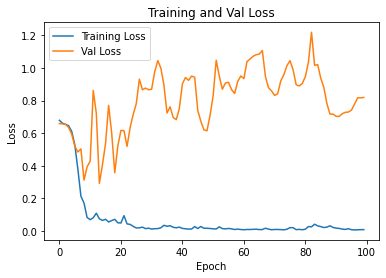

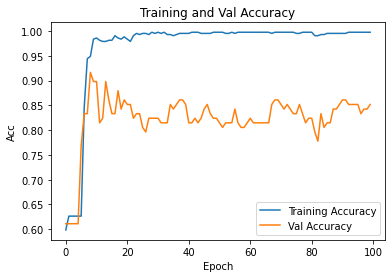

In [5]:
#Model Sentiment with NLTK stopword and Snowball Indonesia (Porter 2) Stemmer
texts = dns['Ulasan'].astype(str)
labels = dns['Label']

#Tokenizer and Pad Sequence
dns_token = Tokenizer(num_words=10000, oov_token='<OOV>')
dns_token.fit_on_texts(texts)
X = dns_token.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50, padding='post')
y = labels
le = LabelEncoder()
y = le.fit_transform(y)
inputembedd = len(dna_token.word_index) + 1

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y,  random_state=42)

#Define LSTM model
model1 = Sequential()
model1.add(Embedding(input_dim = inputembedd, input_length = 50, output_dim = 50))
model1.add(Bidirectional(LSTM(units = 128, dropout = 0.2, return_sequences = True)))
model1.add(Dropout(0.6))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(32, activation='relu'))
model1.add(Bidirectional(LSTM(units = 64)))
model1.add(Dropout(0.4))
model1.add(Dense(1, activation='sigmoid'))

# Compile model
model1.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Train model
history = model1.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64)

# Evaluate model on test set
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model1.predict(X_test)
y_pred = np.round(y_pred).astype(int)
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot grafik
train_loss = history.history['loss']
ac = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(ac, label='Val Loss')
plt.title('Training and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
train_loss = history.history['accuracy']
ac = history.history['val_accuracy']
plt.plot(train_loss, label='Training Accuracy')
plt.plot(ac, label='Val Accuracy')
plt.title('Training and Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [6]:
model1.save('n_s.h5')

Epoch 1/100
7/7 [==============================] - 6s 235ms/step - loss: 0.6803 - accuracy: 0.6125 - val_loss: 0.6644 - val_accuracy: 0.6111
Epoch 2/100
7/7 [==============================] - 0s 32ms/step - loss: 0.6574 - accuracy: 0.6265 - val_loss: 0.6539 - val_accuracy: 0.6111
Epoch 3/100
7/7 [==============================] - 0s 31ms/step - loss: 0.6550 - accuracy: 0.6265 - val_loss: 0.6516 - val_accuracy: 0.6111
Epoch 4/100
7/7 [==============================] - 0s 32ms/step - loss: 0.6422 - accuracy: 0.6265 - val_loss: 0.6401 - val_accuracy: 0.6111
Epoch 5/100
7/7 [==============================] - 0s 32ms/step - loss: 0.6299 - accuracy: 0.6265 - val_loss: 0.6236 - val_accuracy: 0.6111
Epoch 6/100
7/7 [==============================] - 0s 38ms/step - loss: 0.6031 - accuracy: 0.6265 - val_loss: 0.5932 - val_accuracy: 0.6111
Epoch 7/100
7/7 [==============================] - 0s 33ms/step - loss: 0.5496 - accuracy: 0.6288 - val_loss: 0.5399 - val_accuracy: 0.6111
Epoch 8/100
7/7 [==

7/7 [==============================] - 0s 34ms/step - loss: 0.0199 - accuracy: 0.9977 - val_loss: 0.6146 - val_accuracy: 0.8611
Epoch 60/100
7/7 [==============================] - 0s 32ms/step - loss: 0.0056 - accuracy: 0.9977 - val_loss: 0.6355 - val_accuracy: 0.8611
Epoch 61/100
7/7 [==============================] - 0s 33ms/step - loss: 0.0072 - accuracy: 0.9954 - val_loss: 0.6652 - val_accuracy: 0.8519
Epoch 62/100
7/7 [==============================] - 0s 36ms/step - loss: 0.0063 - accuracy: 0.9977 - val_loss: 0.6532 - val_accuracy: 0.8519
Epoch 63/100
7/7 [==============================] - 0s 33ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.6278 - val_accuracy: 0.8611
Epoch 64/100
7/7 [==============================] - 0s 33ms/step - loss: 0.0045 - accuracy: 0.9977 - val_loss: 0.6429 - val_accuracy: 0.8611
Epoch 65/100
7/7 [==============================] - 0s 36ms/step - loss: 0.0049 - accuracy: 0.9977 - val_loss: 0.6413 - val_accuracy: 0.8611
Epoch 66/100
7/7 [========

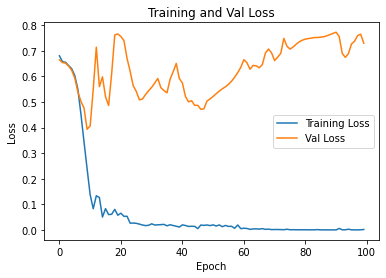

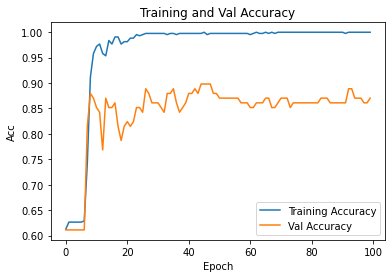

In [8]:
#Model Sentiment with Sastrawi stopword and Nazief Adriani Stemmer
texts = dsa['Ulasan']
labels = dsa['Label']

#Tokenizer and Pad Sequence
dsa_token = Tokenizer(num_words=10000, oov_token='<OOV>')
dsa_token.fit_on_texts(texts)
X = dsa_token.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50, padding='post')
y = labels
le = LabelEncoder()
y = le.fit_transform(y)
inputembedd = len(dna_token.word_index) + 1

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y,  random_state=42)

#Define LSTM model
model2 = Sequential()
model2.add(Embedding(input_dim = inputembedd, input_length = 50, output_dim = 50))
model2.add(Bidirectional(LSTM(units = 64, dropout = 0.2, return_sequences = True)))
model2.add(Dropout(0.6))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation='relu'))
model2.add(Bidirectional(LSTM(units = 32)))
model2.add(Dropout(0.4))
model2.add(Dense(1, activation='sigmoid'))

# Compile model
model2.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Train model
history = model2.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64)

# Evaluate model on test set
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model2.predict(X_test)
y_pred = np.round(y_pred).astype(int)
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot grafik
train_loss = history.history['loss']
ac = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(ac, label='Val Loss')
plt.title('Training and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
train_loss = history.history['accuracy']
ac = history.history['val_accuracy']
plt.plot(train_loss, label='Training Accuracy')
plt.plot(ac, label='Val Accuracy')
plt.title('Training and Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [11]:
model2.save('s_a.h5')

Epoch 1/100
7/7 [==============================] - 6s 263ms/step - loss: 0.6774 - accuracy: 0.6102 - val_loss: 0.6534 - val_accuracy: 0.6111
Epoch 2/100
7/7 [==============================] - 0s 36ms/step - loss: 0.6541 - accuracy: 0.6265 - val_loss: 0.6502 - val_accuracy: 0.6111
Epoch 3/100
7/7 [==============================] - 0s 31ms/step - loss: 0.6394 - accuracy: 0.6265 - val_loss: 0.6362 - val_accuracy: 0.6111
Epoch 4/100
7/7 [==============================] - 0s 34ms/step - loss: 0.6254 - accuracy: 0.6265 - val_loss: 0.6129 - val_accuracy: 0.6111
Epoch 5/100
7/7 [==============================] - 0s 34ms/step - loss: 0.5946 - accuracy: 0.6288 - val_loss: 0.5696 - val_accuracy: 0.6389
Epoch 6/100
7/7 [==============================] - 0s 32ms/step - loss: 0.4996 - accuracy: 0.7077 - val_loss: 0.4757 - val_accuracy: 0.8241
Epoch 7/100
7/7 [==============================] - 0s 34ms/step - loss: 0.3174 - accuracy: 0.9188 - val_loss: 0.5135 - val_accuracy: 0.8611
Epoch 8/100
7/7 [==

7/7 [==============================] - 0s 32ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.5564 - val_accuracy: 0.8981
Epoch 60/100
7/7 [==============================] - 0s 34ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.5668 - val_accuracy: 0.8981
Epoch 61/100
7/7 [==============================] - 0s 33ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.5904 - val_accuracy: 0.8889
Epoch 62/100
7/7 [==============================] - 0s 31ms/step - loss: 9.2560e-04 - accuracy: 1.0000 - val_loss: 0.6080 - val_accuracy: 0.8889
Epoch 63/100
7/7 [==============================] - 0s 32ms/step - loss: 9.7820e-04 - accuracy: 1.0000 - val_loss: 0.6152 - val_accuracy: 0.8889
Epoch 64/100
7/7 [==============================] - 0s 34ms/step - loss: 9.0361e-04 - accuracy: 1.0000 - val_loss: 0.5756 - val_accuracy: 0.8981
Epoch 65/100
7/7 [==============================] - 0s 33ms/step - loss: 4.8425e-04 - accuracy: 1.0000 - val_loss: 0.5839 - val_accuracy: 0.8981
Epoch 66/1

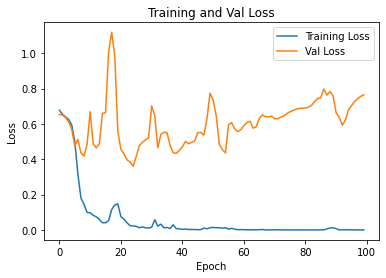

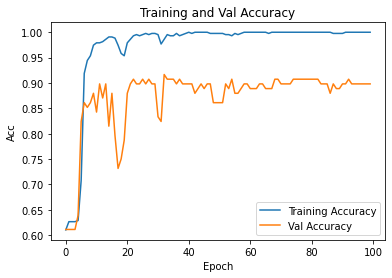

In [12]:
#Model Sentiment with Sastrawi stopword and Snowball Indonesia (Porter 2) Stemmer
texts = dss['Ulasan']
labels = dss['Label']

#Tokenizer and Pad Sequence
dna_token = Tokenizer(num_words=10000, oov_token='<OOV>')
dna_token.fit_on_texts(texts)
X = dna_token.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50, padding='post')
y = labels
le = LabelEncoder()
y = le.fit_transform(y)
inputembedd = len(dna_token.word_index) + 1

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y,  random_state=42)

#Define LSTM model
model3 = Sequential()
model3.add(Embedding(input_dim = inputembedd, input_length = 50, output_dim = 50))
model3.add(Bidirectional(LSTM(units = 128, dropout = 0.2, return_sequences = True)))
model3.add(Dropout(0.6))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(32, activation='relu'))
model3.add(Bidirectional(LSTM(units = 64)))
model3.add(Dropout(0.4))
model3.add(Dense(1, activation='sigmoid'))

# Compile model
model3.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Train model
history = model3.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64)

# Evaluate model on test set
loss, accuracy = model3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model3.predict(X_test)
y_pred = np.round(y_pred).astype(int)
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot grafik
train_loss = history.history['loss']
ac = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(ac, label='Val Loss')
plt.title('Training and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
train_loss = history.history['accuracy']
ac = history.history['val_accuracy']
plt.plot(train_loss, label='Training Accuracy')
plt.plot(ac, label='Val Accuracy')
plt.title('Training and Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [13]:
model3.save('s_s.h5')